# <center>Feedforward and Backpropagation</center>
## <center>Inclass Project 2 - MA4144</center>

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a Multi Layer perceptron (MLP) model from scratch for binary classification. That is given an input $x$ output the associated class label $0$ or $1$.

In particular, we will classify images of handwritten digits ($0, 1, 2, \cdots, 9$). For example, given a set of handwritten digit images that only contain two digits (Eg: $1$ and $5$) the model will classify the images based on the written digit.

For this we will use the MNIST dataset (collection of $28 \times 28$ images of handwritten digits) - you can find additional information about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width="250">

***


Use the below cell to use any include any imports

In [200]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Section 1: Preparing the data

In [201]:
#Load the dataset as training and testing, then print out the shapes of the data matrices

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


**Q1.** In the following cell write code to display $5$ random images in train_X and it's corresponding label in train_y. Each time it is run, you should get a different set of images. The imshow function in the matplotlib library could be useful. Display them as [grayscale images](https://en.wikipedia.org/wiki/Grayscale).

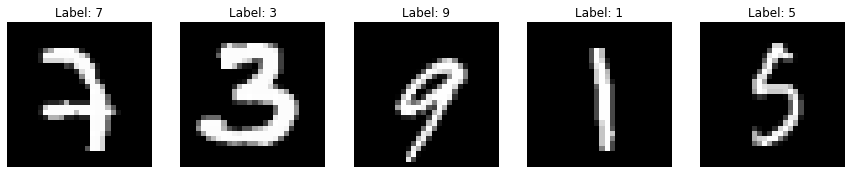

In [202]:
#TODO 

random_indices = np.random.choice(train_X.shape[0], 5, replace=False)
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

for i, idx in enumerate(random_indices):
    axes[i].imshow(train_X[idx], cmap='gray')  
    axes[i].set_title(f"Label: {train_y[idx]}")
    axes[i].axis('off')  

plt.show()


**Q2.** Given two digits $d_1$ and $d_2$, both between $0$ and $9$, in the following cell fill in the function body to extract all the samples corresponding to $d_1$ or $d_2$ only, from the dataset $X$ and labels $y$. You can use the labels $y$ to filter the dataset. Assume that the $i$th image $X[i]$ in $X$ is given by $y[i]$. The function should return the extracted samples $X_{extracted}$ and corresponding labels $y_{extracted}$. Avoid using for loops as much as possible, infact you do not need any for loops. numpy.where function should be useful.

In [203]:
def extract_digits(X, y, d1, d2):
    assert d1 in range(0, 10), "d1 should be a number between 0 and 9 inclusive"
    assert d2 in range(0, 10), "d2 should be a number between 0 and 9 inclusive"    
    mask = np.where((y == d1) | (y == d2))
    X_extracted = X[mask]
    y_extracted = y[mask]   
    return X_extracted, y_extracted

**Q3.** Both the training dataset train_X and test_y is a 3 dimensional numpy array, each image occupies 2 dimensions. For convenience of processing data we usually comvert each $28 \times 28$ image matrix to a vector with $784$ entries. We call this process **vectorize images**.

Once we vectorize the images, the vectorized data set would be structured as follows: $i$th row will correspond to a single image and $j$th column will correspond to the $j$th pixel value of each vectorized image. However going along with the convention we discussed in the lecture, the input to the MLP model will require that the columns correspond to individual images. Hence we also require a transpose of the vectorized results.

The pixel values in the images will range from $0$ to $255$. Normalize the pixel values between $0$ and $1$, by dividing each pixel value of each image by the maximum pixel value of that image. Simply divide each column of the resulting matrix above by the max of each column. 

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdN_8m9FEqjqAB07obTmB6gNc7S2rSoGBYaA&s"></center>

Given a dataset $X$ of size $N \times 28 \times 28$, in the following cell fill in the function to do the following in order;
1. Vectorize the dataset resulting in dataset of size $N \times 784$.
2. Transpose the vectorized result.
3. Normalize the pixel values of each image.
4. Finally return the vectorized, transposed and normalized dataset $X_{transformed}$.

Again, avoid for loops, functions such as numpy.reshape, numpy.max etc should be useful.

In [204]:
def vectorize_images(X): 
    X_vectorized = X.reshape(X.shape[0], 28 * 28)      # Vectorize the dataset (reshape from N x 28 x 28 to N x 784)
    X_transposed = X_vectorized.T                      # Transpose the result (from N x 784 to 784 x N)
    X_transformed = X_transposed / 255.0               # Normalize the pixel values (between 0 and 1 by dividing by 255)    
    return X_transformed


**Q4.** In the following cell write code to;

1. Extract images of the digits $d_1 = 1$ and $d_2 = 5$ with their corresponding labels for both the training set (train_X, train_y) and testing set (test_X, test_y) separately.
2. Then vectorize the data, tranpose the result and normlize the images.
3. Store the results after the final transformations in numpy arrays train_X_1_5, train_y_1_5, test_X_1_5, test_y_1_5
4. Our MLP will output only class labels $0$ and $1$ (not $1$ and $5$), so create numpy arrays to store the class labels as follows:
   $d_1 = 1$ -> class label = 0 and $d_2 = 5$ -> class label = 1. Store them in the arrays named train_class_1_5, test_class_1_5.

Use the above functions you implemented above to complete this task. In addtion, numpy.where could be useful. Avoid for loops as much as possible.

In [205]:
# Extract images of digits d1=1 and d2=5 for both train and test sets
d1, d2 = 1, 5

# Using the extract_digits function to get images for digits 1 and 5
train_X_1_5, train_y_1_5 = extract_digits(train_X, train_y, d1, d2)
test_X_1_5, test_y_1_5 = extract_digits(test_X, test_y, d1, d2)

# Vectorize, transpose, and normalize the data for both train and test sets
train_X_1_5 = vectorize_images(train_X_1_5)
test_X_1_5 = vectorize_images(test_X_1_5)

# Convert labels (d1=1 -> class label 0, d2=5 -> class label 1)
train_class_1_5 = np.where(train_y_1_5 == d1, 0, 1)
test_class_1_5 = np.where(test_y_1_5 == d1, 0, 1)


## Section 2: Implementing MLP from scratch with training algorithms.

Now we will implement code to build a customizable MLP model. The hidden layers will have the **Relu activation function** and the final output layer will have **Sigmoid activation function**.

**Q5.** Recall the following about the activation functions:
1. Sigmoid activation: $y = \sigma(z) = \frac{1}{1 + e^{-z}}$.
2. Derivative of Sigmoid: $y' = \sigma'(z) = \sigma(z) (1 - \sigma(z)) = y(1-y)$
3. ReLu activation: $y = ReLu(z) = max(0, z)$
4. Derivative of ReLu: $y' = ReLu'(z) = \begin{cases} 0 \; \textrm{if } z < 0 \\ 1 \; \textrm{otherwise} \end{cases} = \begin{cases} 0 \; \textrm{if } y = 0 \\ 1 \; \textrm{otherwise} \end{cases}$

In the following cell implement the functions to compute activation functions Sigmoid and ReLu given $z$ and derivatives of the Sigmoid and ReLu activation functions given $y$. Note that the input to the derivative functions is $y$ not $z$.

In practice the input will not be just single numbers, but matrices. So functions or derivatives should be applied elementwise on matrices. Again avoid for loops, use the power of numpy arrays - search for numpy's capability of doing elementwise computations.

Important: When implementing the sigmoid function make sure you handle overflows due to $e^{-z}$ being too large. To avoid you can choose to set the sigmoid value to 'the certain appropriate value' if $z$ is less than a certain good enough negative threshold. If you do not handle overflows, the entire result will be useless fince the MLP will just output Nan (not a number) for evry input at the end.

In [206]:
# Sigmoid function
def sigmoid(Z):
    Z = np.clip(Z, -500, 500)      # Clip values to prevent overflow
    sigma = 1 / (1 + np.exp(-Z))   
    return sigma

# Derivative of the Sigmoid function
def deriv_sigmoid(Y):
    sigma_prime = Y * (1 - Y)  
    return sigma_prime

# ReLU activation function
def ReLu(Z):
    relu = np.maximum(0, Z) 
    return relu

# Derivative of the ReLU function
def deriv_ReLu(Y):
    relu_prime = np.where(Y > 0, 1, 0)  
    return relu_prime


**Q6.** The following piece of code defines a simple MLP architecture as a Python class and subsequent initialization of a MLP model. <font color='blue'>Certain lines of code contains commented line numbers. Write a short sentence for each such line explaining its purpose. Feel free to refer to the lecture notes or any resources to answers these question. In addition, explain what the Y, Z, W variables refer to and their purpose</font>

In [207]:
class NNet:
    def __init__(self, input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50]):
        self.Y = []
        self.Z = []
        self.W = []
        self.input_size = input_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers

        layers = [input_size] + hidden_layers + [output_size]
        L = len(hidden_layers) + 1
    
        for i in range(1, L + 1):
            self.Y.append(np.zeros((layers[i], batch_size)))                        #line1
            self.Z.append(np.zeros((layers[i], batch_size)))                        #Line2
            self.W.append(2*(np.random.rand(layers[i], layers[i-1] + 1) - 0.5))     #Line3

**Answers** (to write answers edit this cell)

(i) What does the Y, Z, W variables refer to and their purpose?

(ii) Line1: Explanation

(iii) Line2: Explanation

(iv) Line3: Explanation

### i)  Y - Outputs of each layer after applying the activation function
###     Z - Weighted inputs to each layer before applying the activation function
###    W - weight matrices for each layer
    
### ii) This line initializes a zero matrix to store the outputs(Y) for the i-th layer

### iii) This line initializes a zero matrix to store the pre-activation values (Z) for the i-th layer, i.e., the result of the matrix multiplication between the previous layer’s output and the current layer’s weight matrix, before applying the activation function

### iv) This line initializes the weight matrix W[i] for the i-th layer. It uses random initialization between -1 and 1 (scaled by subtracting 0.5 and multiplying by 2). The size of the weight matrix is (layers[i], layers[i-1] + 1) to account for the additional bias term. The extra "+1" allows for a bias term in each neuron.

**Q7.** Now we will implement the feedforward algorithm. Recall from the lectures that for each layer $l$ there is input $Y^{(l-1)}$ from the previous layer if $l > 1$ and input data $X$ if $l = 1$. Then we compute $Z^{(l)}$ using the weight matrix $W^{(l)}$ as follows from matrix multiplication:

$Z^{(l)} = W^{(l)} Y^{(l-1)}$

Make sure that during multiplication you add an additional row of one's to $Y^{(l-1)}$ to accommodate the bias term. However, the rows of ones should not permanently remain on $Y^{(l-1)}$. <font color='blue'>Explain what the bias term is and how adding a row of one's help with the bias terms.</font> During definition above the weight matrices are initialised to afford this extra bias term, so no change to either $Z^{(l)}$ or $W^{(l)}$ is needed.

Next compute $Y^{(l)}$, the output of layer $l$ by activation through sigmoid.

$Y^{(l)} = \sigma(Z^{(l)})$

The implemented feedforward algorithm should take in a NNet model and an input matrix $X$ and output the modified MLP model - the $Y$'s and $Z$'s computed should be stored in the model for the backpropagation algorithm.

As usual avoid for loops as much as possible, use the power of numpy. However, you may use a for loop to iterate through the layers of the model.

In [208]:
def feedforward(model, X):
    
    Y_prev = X
    batch_size = Y_prev.shape[1]
    
    for l in range(len(model.W)):
        Y_prev_with_bias = np.vstack([np.ones((1, batch_size)), Y_prev])  # Add ones for bias handling
        Z_l = np.dot(model.W[l], Y_prev_with_bias)  # W[l] contains the weights of layer l
        model.Z[l] = Z_l  # Store Z for later use in backpropagation
        
        if l < len(model.W) - 1:   # Hidden layers
            Y_l = ReLu(Z_l)
        else:                      # Output layer (Sigmoid activation)
            Y_l = sigmoid(Z_l)
        
        model.Y[l] = Y_l           # Store the activation output
        Y_prev = Y_l               # Update Y_prev for the next layer
    
    return model


**Answer** (to write answers edit this cell)

Explain what the bias term is and how adding a row of one's help with the bias terms.

### The bias term is an additional parameter in the neural network that helps the model shift the activation function.
### Mathematically, the bias term is represented as an additional constant added to the weighted sum of the input features before passing it to the activation function.

### When we add a row of ones to the input, we can treat the bias as just another weight in the weight matrix. 
### Each neuron's bias term is associated with a specific weight that multiplies by the "1" from the appended row, effectively adding the bias to the weighted sum without needing separate addition steps.


**Q8.** Now we will implement the backpropagation algorithm. The cost function $C$ at the end is given by the square loss.

$C = \frac{1}{2} ||Y^{(L)} - Y||^{2}$, where $Y^{(L)}$ is the final output vector of the feedforward algorithm and $Y$ is the actual label vector associated with the input $X$.

At each layer $l = 1, 2, \cdots, L$ we compute the following (note that the gradients are matrices with the same dimensions as the variable to which we derivating with respect to):

1. Gradient of $C$ with respect to $Z^{(l)}$ as <br> $\frac{\partial C}{\partial Z^{(l)}} = deriv(A^{(l)}(Z^{(l)})) \odot \frac{\partial C}{\partial Y^{(L)}} $, <br> where $A^{(l)}$ is the activation function of the $l$th layer, and we use the derivative of that here. The $\odot$ refers to the elementwise multiplication.

2. Gradient of $C$ with respect to $W^{(l)}$ as <br> $\frac{\partial C}{\partial W^{(l)}} = \frac{\partial C}{\partial Z^{(l)}} (Y^{(l-1)})^{T}$ <br> this is entirely matrix multiplication.

3. Gradient of $C$ with respect to $Y^{(l-1)}$ as <br> $\frac{\partial C}{\partial Y^{(l-1)}} = (W^{(l)})^{T} \frac{\partial C}{\partial Z^{(l)}}$ <br> this is also entirely matrix multiplication.

4. Update weights by: <br> $W^{(l)} \leftarrow W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}}$, <br> where $\eta > 0$ is the learning rate.

The loss derivative (the gradient of $C$ with respect to $Y^{(L)}$) at the last layer is given by:

$\frac{\partial C}{\partial Y^{(L)}} = Y^{(L)} - Y$

By convention we consider $Y^{(0)} = X$, the input data.

Based on the backpropagation algorithm implement the backpropagation method in the following cell. Remember to temporarily add a row of ones to $Y^{(l-1)}$ when computing $\frac{\partial C}{\partial W^{(l)}}$ as we discussed back in the feedforward algorithm. Make sure you avoid for loops as much as possible.

The function takes in a NNet model, input data $X$ and the corresponding class labels $Y$. learning rate can be set as desired.

In [209]:
def backpropagation(model, X, Y, eta=0.01):
    # TODO
    model = feedforward(model, X) # Feedforward pass first
    L = len(model.W)              # Total number of layers
    dY = model.Y[L-1] - Y
    dZ = deriv_sigmoid(model.Y[L-1]) * dY
    
    # Backpropagate the error
    for l in range(L-1, -1, -1):
        Y_prev_with_bias = np.vstack([model.Y[l-1], np.ones((1, model.Y[l-1].shape[1]))]
                                     ) if l > 0 else np.vstack([X, np.ones((1, X.shape[1]))])
        dW = np.dot(dZ, Y_prev_with_bias.T) / X.shape[1]
        model.W[l] -= eta * dW
        if l > 0:
            dZ = np.dot(model.W[l].T, dZ)[:-1] * deriv_ReLu(model.Y[l-1])
    return model


**Q9.** Now implement the training algorithm.

The training method takes in training data $X$, actual label $Y$, number of epochs, batch_size, learning rate $\eta > 0$. The training will happen in epochs. For each epoch, permute the data columns of both $X$ and $Y$, then divide both $X$ and $Y$ into mini batches each with the given batch size. Then run the feedforward and backpropagation for each such batch iteratively.

At the end of each iteration, keep trach of the cost $C$ and the $l_2$-norm of change in each weight matrix $W^{(l)}$.

At the end of the last epoch, plot the variation cost $C$ and change in weight matrices. Then return the trained model.



In [210]:
def train_NNet(X, Y, epochs=20, batch_size=1000, eta=0.01):
    # TODO
    num_samples = X.shape[1]
    num_batches = num_samples // batch_size
    cost_history = []
    weight_change_history = []
    
    model = NNet(input_size=X.shape[0], output_size=1,
                 batch_size=batch_size, hidden_layers=[500, 250, 50])

    # Iterate through the epochs
    for epoch in range(epochs):
        perm = np.random.permutation(num_samples)
        X_shuffled = X[:, perm]
        Y_shuffled = Y[perm]
        total_cost = 0
        weight_changes = []

        for i in range(0, num_samples, batch_size):
            X_batch = X_shuffled[:, i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]
            model = feedforward(model, X_batch)
            model = backpropagation(model, X_batch, Y_batch, eta)
            cost = 0.5 * np.sum((model.Y[-1] - Y_batch) ** 2)
            total_cost += cost
            weight_changes.append([np.linalg.norm(w_change)
                                  for w_change in model.W])

        cost_history.append(total_cost / num_batches)
        weight_change_history.append(np.mean(weight_changes))

    # plt.plot(cost_history)
    plt.figure(figsize=(4, 2))
    plt.plot(cost_history)
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.title('Cost History')
    plt.show()

    return model

## Section 3: Evaluation using test data

The following function will evaluate then return an accuracy score and the predicted labels for your model. Do not change anything here.

In [211]:
def test_model(test_data, test_labels, model, d1, d2):
    
    L = len(model.hidden_layers) + 1
    
    Y = test_data
    for i in range(L):
        Z = np.matmul(model.W[i], np.append(Y, np.array([np.ones(Y.shape[1])]), axis = 0))
        if i < L - 1:
            Y = ReLu(Z)
        else:
            Y = sigmoid(Z)
    
    Y = Y[0]
    Y = np.where(Y >= 0.5, 1, 0)
    Y_predicted = np.where(Y == 0, d1, d2)

    acc = accuracy_score(test_labels, Y_predicted)

    return(acc, Y_predicted)

    

**Q10.** Use this test_model function to evaluate your model with the $1$ and $5$ digits. An accuracy $>= 99%$ is achievable. Test with different batch sizes, $\eta$ values and hidden layers. Find which of those hyperparameters gives the best test accuracy. <font color='blue'>Document the hyperparameter values that gives the best testing accuracy and that best accuracy. Plot a confusion matrix and comment on your observations with reasons. Also, look into the nature of the plots that result fom the training procedure, see how they vary with the hyperparameters and provide your ideas on the observations. Then do the same with a few other pairs of digits $d_1, d_2$. Especially, try $d_1 = 1, d_2 = 7$. Comment on your observations and explain possible reasons</font>.

Testing batch_size=32, eta=0.001, hidden_layers=[100]


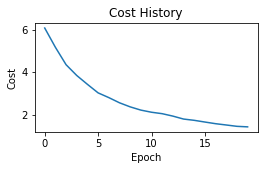

Accuracy: 0.92


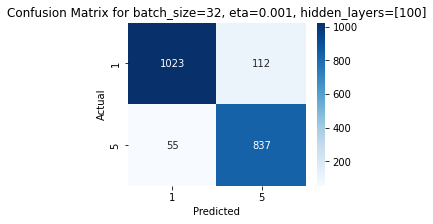

Testing batch_size=32, eta=0.001, hidden_layers=[500, 250]


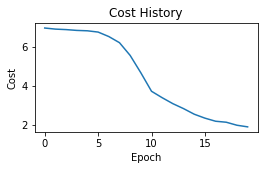

Accuracy: 0.89


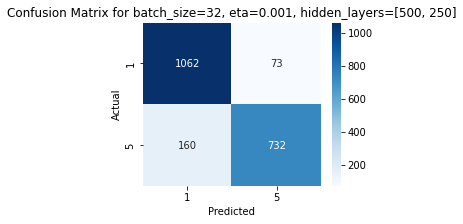

Testing batch_size=32, eta=0.001, hidden_layers=[500, 250, 50]


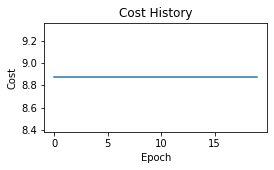

Accuracy: 0.44


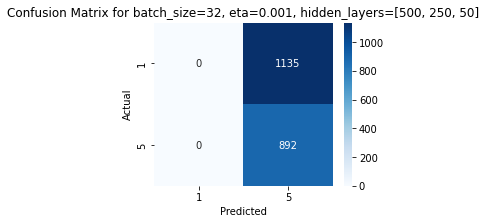

Testing batch_size=32, eta=0.01, hidden_layers=[100]


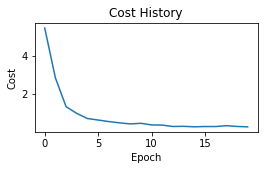

Accuracy: 0.98


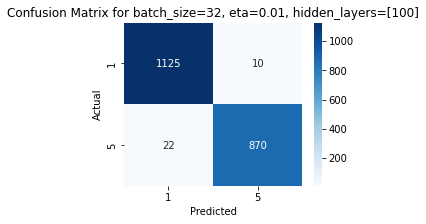

Testing batch_size=32, eta=0.01, hidden_layers=[500, 250]


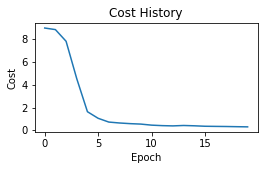

Accuracy: 0.99


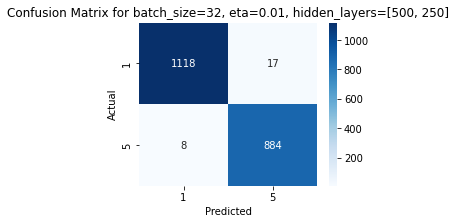

Testing batch_size=32, eta=0.01, hidden_layers=[500, 250, 50]


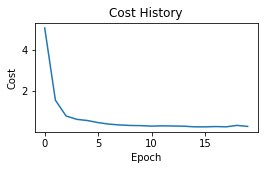

Accuracy: 0.99


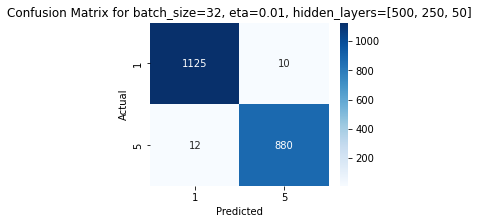

Testing batch_size=32, eta=0.1, hidden_layers=[100]


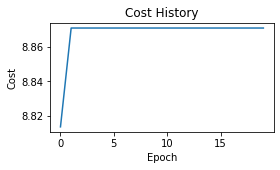

Accuracy: 0.44


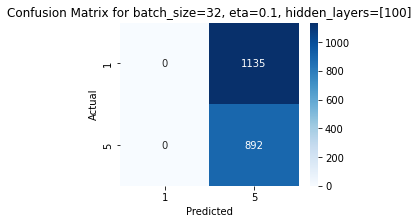

Testing batch_size=32, eta=0.1, hidden_layers=[500, 250]


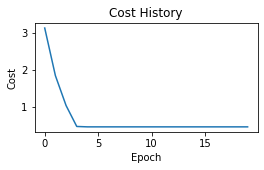

Accuracy: 0.97


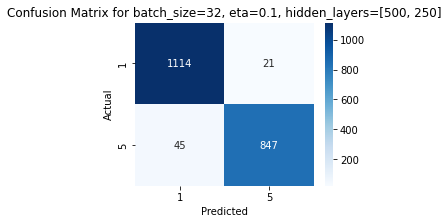

Testing batch_size=32, eta=0.1, hidden_layers=[500, 250, 50]


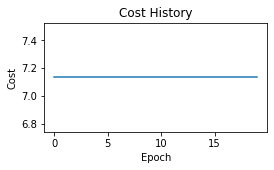

Accuracy: 0.56


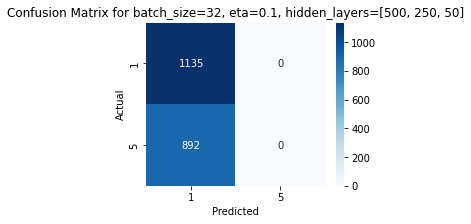

Testing batch_size=128, eta=0.001, hidden_layers=[100]


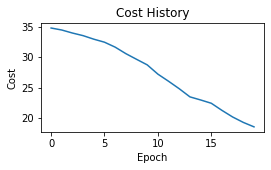

Accuracy: 0.71


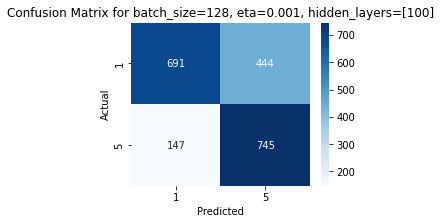

Testing batch_size=128, eta=0.001, hidden_layers=[500, 250]


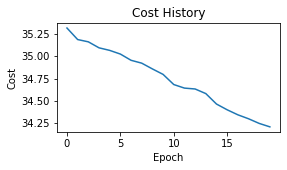

Accuracy: 0.46


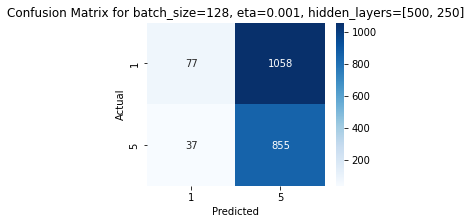

Testing batch_size=128, eta=0.001, hidden_layers=[500, 250, 50]


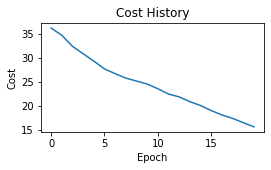

Accuracy: 0.75


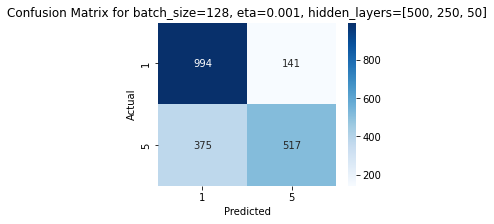

Testing batch_size=128, eta=0.01, hidden_layers=[100]


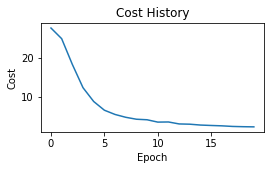

Accuracy: 0.97


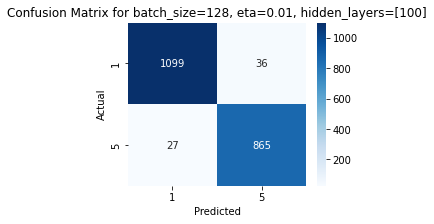

Testing batch_size=128, eta=0.01, hidden_layers=[500, 250]


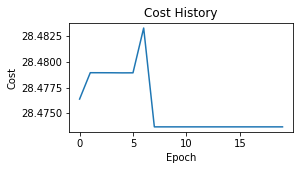

Accuracy: 0.56


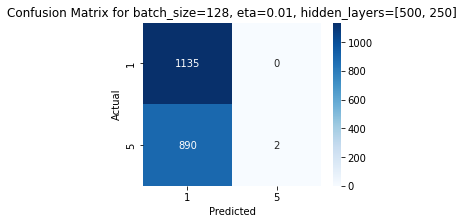

Testing batch_size=128, eta=0.01, hidden_layers=[500, 250, 50]


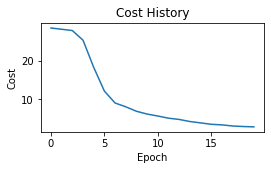

Accuracy: 0.96


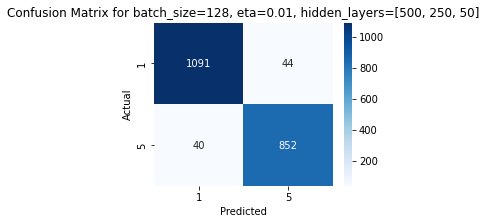

Testing batch_size=128, eta=0.1, hidden_layers=[100]


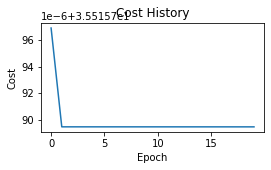

Accuracy: 0.44


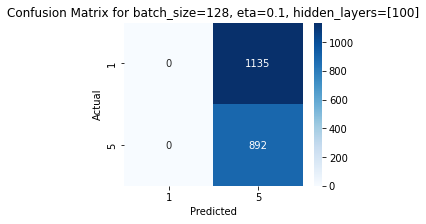

Testing batch_size=128, eta=0.1, hidden_layers=[500, 250]


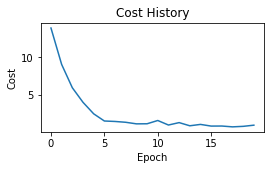

Accuracy: 0.99


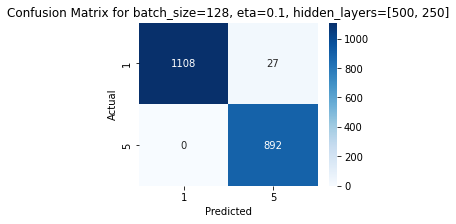

Testing batch_size=128, eta=0.1, hidden_layers=[500, 250, 50]


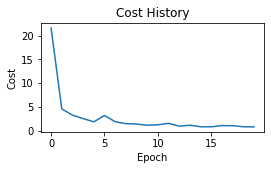

Accuracy: 0.99


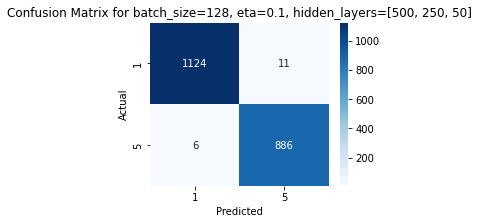

Testing batch_size=500, eta=0.001, hidden_layers=[100]


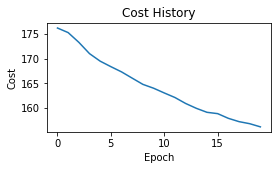

Accuracy: 0.39


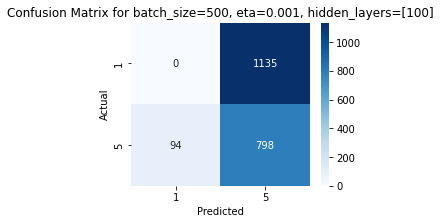

Testing batch_size=500, eta=0.001, hidden_layers=[500, 250]


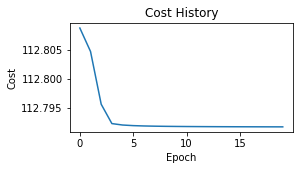

Accuracy: 0.56


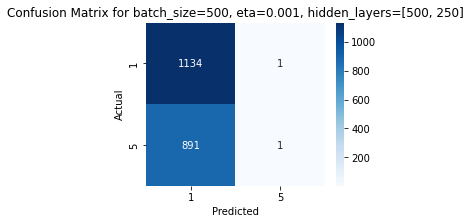

Testing batch_size=500, eta=0.001, hidden_layers=[500, 250, 50]


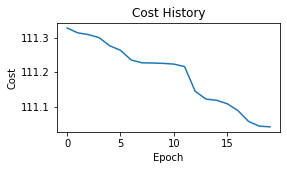

Accuracy: 0.57


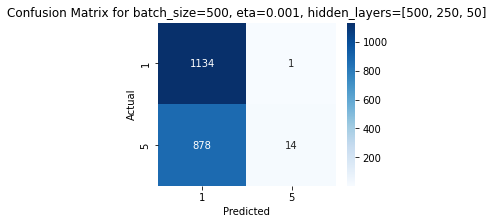

Testing batch_size=500, eta=0.01, hidden_layers=[100]


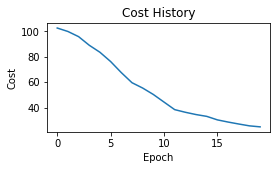

Accuracy: 0.91


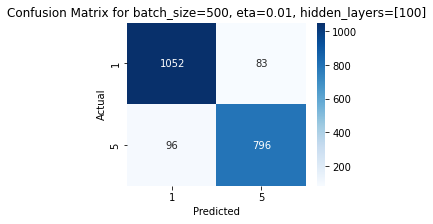

Testing batch_size=500, eta=0.01, hidden_layers=[500, 250]


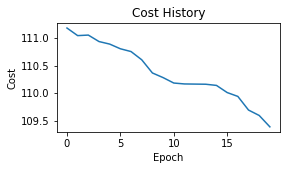

Accuracy: 0.58


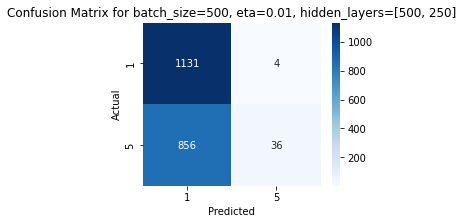

Testing batch_size=500, eta=0.01, hidden_layers=[500, 250, 50]


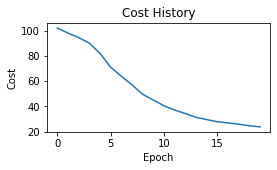

Accuracy: 0.91


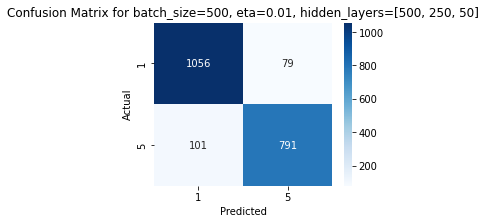

Testing batch_size=500, eta=0.1, hidden_layers=[100]


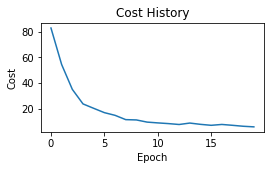

Accuracy: 0.98


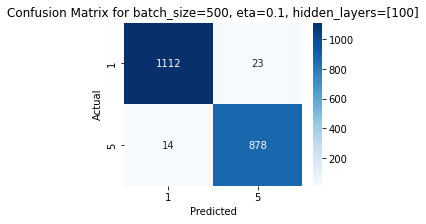

Testing batch_size=500, eta=0.1, hidden_layers=[500, 250]


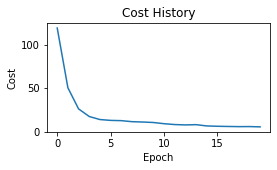

Accuracy: 0.99


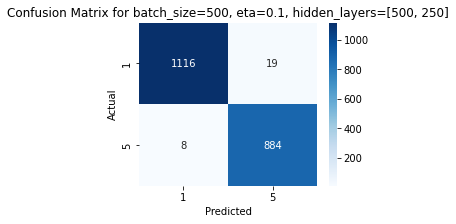

Testing batch_size=500, eta=0.1, hidden_layers=[500, 250, 50]


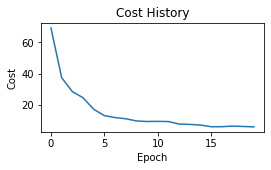

Accuracy: 0.99


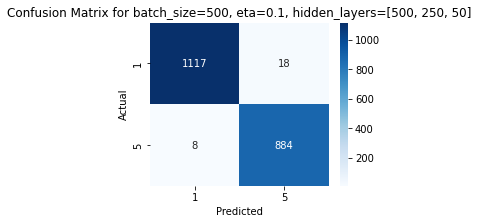

Testing batch_size=1000, eta=0.001, hidden_layers=[100]


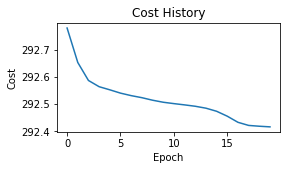

Accuracy: 0.42


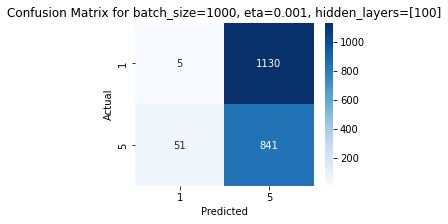

Testing batch_size=1000, eta=0.001, hidden_layers=[500, 250]


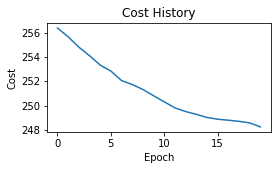

Accuracy: 0.51


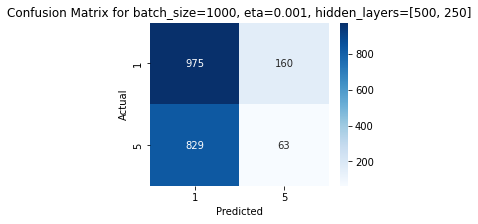

Testing batch_size=1000, eta=0.001, hidden_layers=[500, 250, 50]


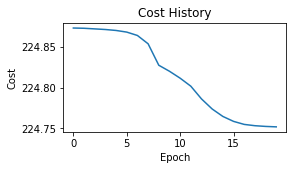

Accuracy: 0.56


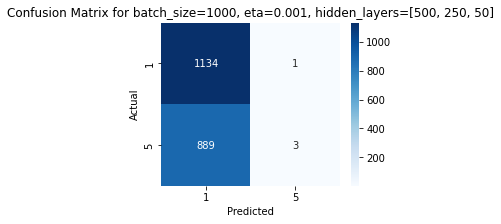

Testing batch_size=1000, eta=0.01, hidden_layers=[100]


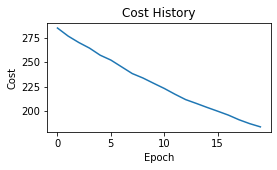

Accuracy: 0.65


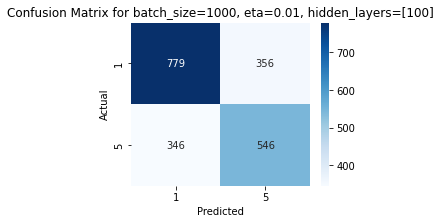

Testing batch_size=1000, eta=0.01, hidden_layers=[500, 250]


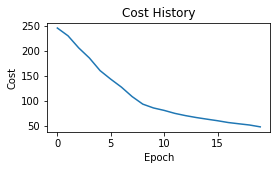

Accuracy: 0.91


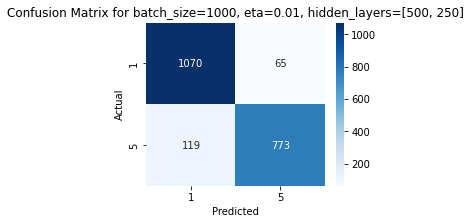

Testing batch_size=1000, eta=0.01, hidden_layers=[500, 250, 50]


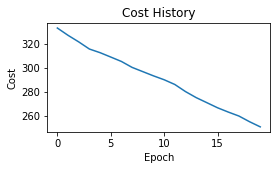

Accuracy: 0.52


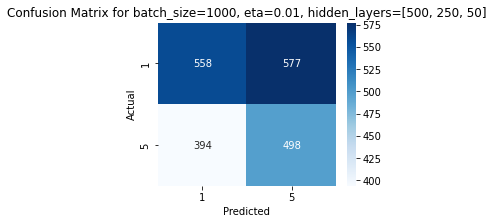

Testing batch_size=1000, eta=0.1, hidden_layers=[100]


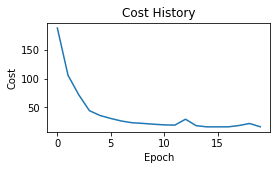

Accuracy: 0.98


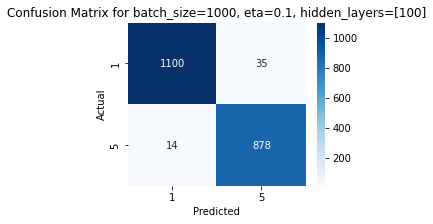

Testing batch_size=1000, eta=0.1, hidden_layers=[500, 250]


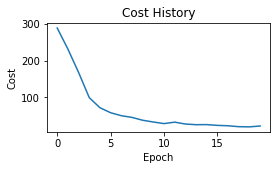

Accuracy: 0.96


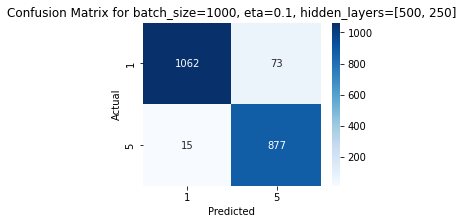

Testing batch_size=1000, eta=0.1, hidden_layers=[500, 250, 50]


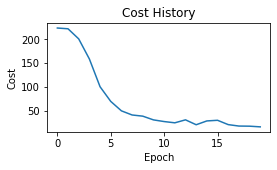

Accuracy: 0.98


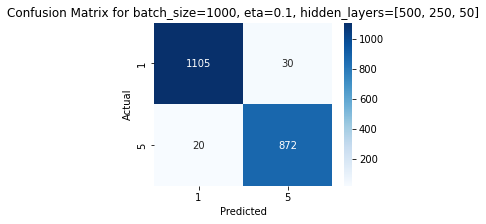

Testing batch_size=2000, eta=0.001, hidden_layers=[100]


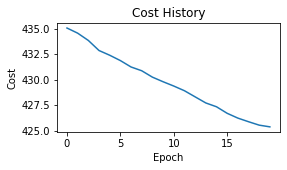

Accuracy: 0.58


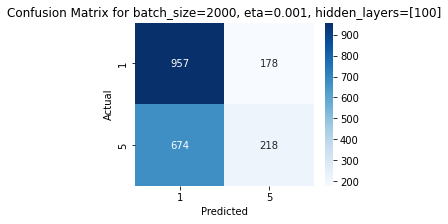

Testing batch_size=2000, eta=0.001, hidden_layers=[500, 250]


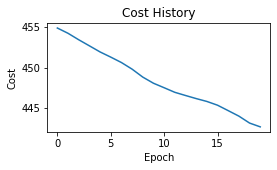

Accuracy: 0.58


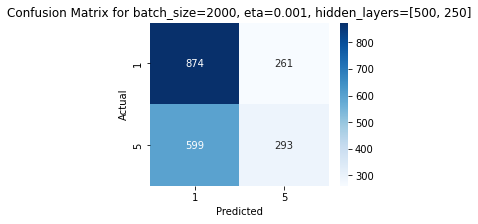

Testing batch_size=2000, eta=0.001, hidden_layers=[500, 250, 50]


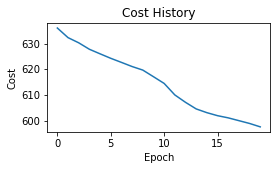

Accuracy: 0.43


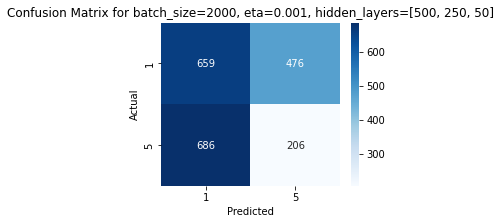

Testing batch_size=2000, eta=0.01, hidden_layers=[100]


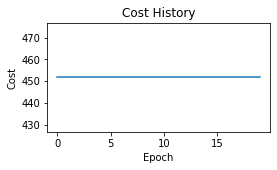

Accuracy: 0.56


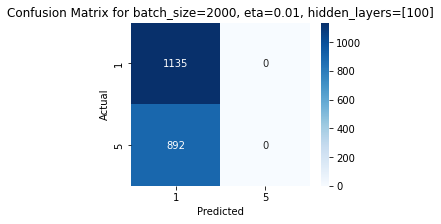

Testing batch_size=2000, eta=0.01, hidden_layers=[500, 250]


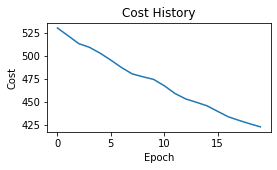

Accuracy: 0.56


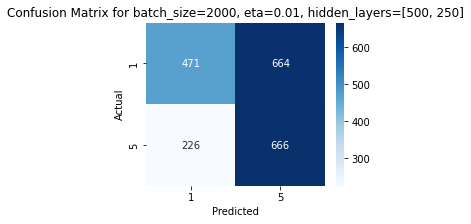

Testing batch_size=2000, eta=0.01, hidden_layers=[500, 250, 50]


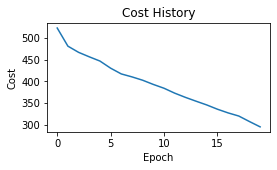

Accuracy: 0.73


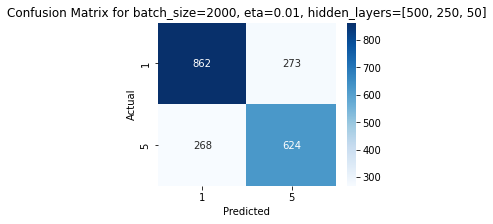

Testing batch_size=2000, eta=0.1, hidden_layers=[100]


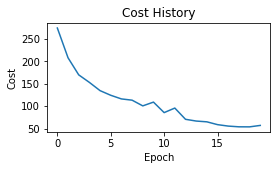

Accuracy: 0.95


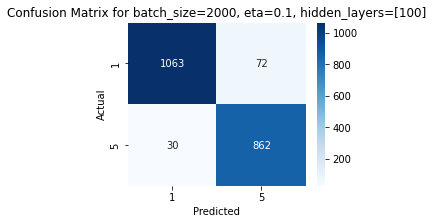

Testing batch_size=2000, eta=0.1, hidden_layers=[500, 250]


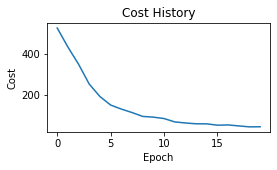

Accuracy: 0.97


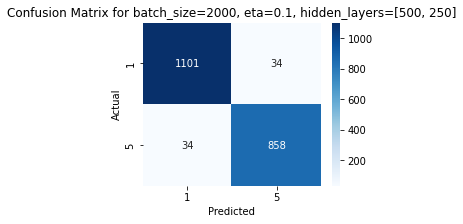

Testing batch_size=2000, eta=0.1, hidden_layers=[500, 250, 50]


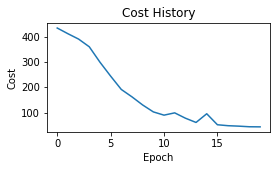

Accuracy: 0.97


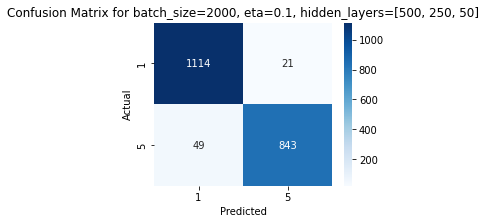

Hyperparameter tuning complete
Best accuracy: 0.99 with parameters: batch_size=128, eta=0.1, hidden_layers=[500, 250, 50]


In [188]:
# Hyperparameter testing
batch_sizes = [32, 128, 500, 1000, 2000]
learning_rates = [0.001, 0.01, 0.1]
hidden_layers_options = [[100], [500, 250], [500, 250, 50]]

def Hyperparameter_run(batch_sizes, learning_rates, hidden_layers_options, test_X_d1_d2, test_class_d1_d2, train_X_d1_d2, train_class_d1_d2):
      best_accuracy = 0
      best_params = None
      for batch_size in batch_sizes:
          for eta in learning_rates:
              for hidden_layers in hidden_layers_options:
                  print(f"Testing batch_size={batch_size}, eta={eta}, hidden_layers={hidden_layers}")
                  model = train_NNet(train_X_d1_d2, train_class_d1_d2,
                                     epochs=20, batch_size=batch_size, eta=eta)
                  acc, Y_pred = test_model(test_X_d1_d2, test_class_d1_d2, model, 0, 1)

                  print(f"Accuracy: {acc:.2f}")

                  if acc > best_accuracy:
                      best_accuracy = acc
                      best_params = (batch_size, eta, hidden_layers)

                  cm = confusion_matrix(test_class_d1_d2, Y_pred)
                  plt.figure(figsize=(4, 3))
                  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                              xticklabels=[1, 5], yticklabels=[1, 5])
                  plt.xlabel('Predicted')
                  plt.ylabel('Actual')
                  plt.title(f'Confusion Matrix for batch_size={batch_size}, eta={eta}, hidden_layers={hidden_layers}')
                  plt.show()

      print("Hyperparameter tuning complete")
      print(f"Best accuracy: {best_accuracy:.2f} with parameters: batch_size={best_params[0]}, eta={best_params[1]}, hidden_layers={best_params[2]}")

Hyperparameter_run(batch_sizes, learning_rates, hidden_layers_options, test_X_1_5, test_class_1_5, train_X_1_5, train_class_1_5)


Testing batch_size=500, eta=0.001, hidden_layers=[500, 250, 50]


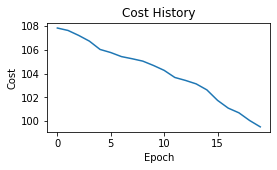

Accuracy: 0.60


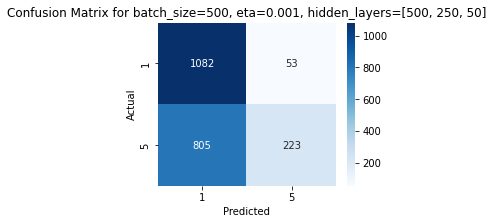

Testing batch_size=500, eta=0.1, hidden_layers=[500, 250, 50]


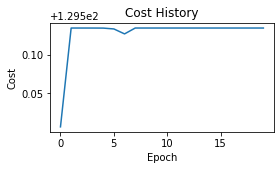

Accuracy: 0.48


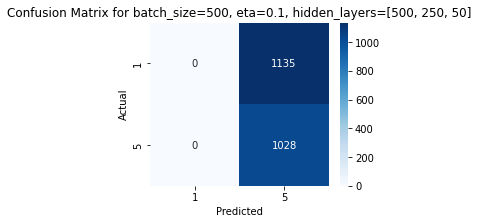

Hyperparameter tuning complete
Best accuracy: 0.60 with parameters: batch_size=500, eta=0.001, hidden_layers=[500, 250, 50]


In [191]:
d1, d2 = 1, 7
train_X_1_7, train_y_1_7 = extract_digits(train_X, train_y, d1, d2)
test_X_1_7, test_y_1_7 = extract_digits(test_X, test_y, d1, d2)

train_X_1_7 = vectorize_images(train_X_1_7)
test_X_1_7 = vectorize_images(test_X_1_7)

train_class_1_7 = np.where(train_y_1_7 == d1, 0, 1)
test_class_1_7 = np.where(test_y_1_7 == d1, 0, 1)

# Hyperparameter testing
batch_sizes = [500,]
learning_rates = [0.001, 0.1]
hidden_layers_options = [[500, 250, 50]]

Hyperparameter_run(batch_sizes, learning_rates, hidden_layers_options, test_X_1_7, test_class_1_7, train_X_1_7, train_class_1_7)

Train X shape: (784, 11982), Train labels shape: (11982,)
Test X shape: (784, 1984), Test labels shape: (1984,)
Testing batch_size=500, eta=0.001, hidden_layers=[500, 250, 50]


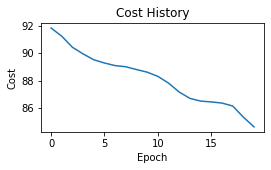

Accuracy: 0.71


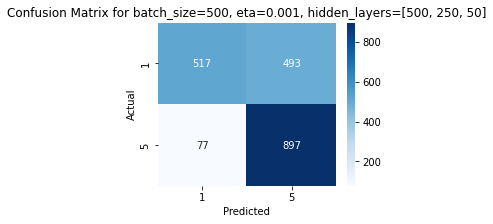

Testing batch_size=500, eta=0.1, hidden_layers=[500, 250, 50]


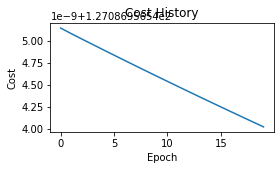

Accuracy: 0.51


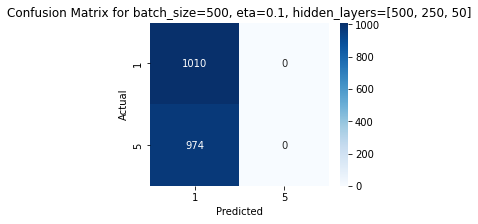

Hyperparameter tuning complete
Best accuracy: 0.71 with parameters: batch_size=500, eta=0.001, hidden_layers=[500, 250, 50]


In [193]:
train_X_3_8, train_y_3_8 = extract_digits(train_X, train_y, 3, 8)
test_X_3_8, test_y_3_8 = extract_digits(test_X, test_y, 3, 8)

train_X_3_8 = vectorize_images(train_X_3_8)
test_X_3_8 = vectorize_images(test_X_3_8)

train_class_3_8 = np.where(train_y_3_8 == 3, 0, 1)
test_class_3_8 = np.where(test_y_3_8 == 3, 0, 1)

print(f"Train X shape: {train_X_3_8.shape}, Train labels shape: {train_class_3_8.shape}")
print(f"Test X shape: {test_X_3_8.shape}, Test labels shape: {test_class_3_8.shape}")

# Hyperparameter testing
batch_sizes = [500]
learning_rates = [0.001, 0.1]
hidden_layers_options = [[500, 250, 50]]

Hyperparameter_run(batch_sizes, learning_rates, hidden_layers_options, test_X_3_8, test_class_3_8, train_X_3_8, train_class_3_8)


## 1. Documenting the Best Hyperparameters and Accuracy for Different Digit Pairs

### Digits 1 and 5:
Best Accuracy: 0.99
Hyperparameters:
                batch_size = 128
                eta (learning rate) = 0.1
hidden_layers = [500, 250, 50]

### Digits 1 and 7:
Best Accuracy: 0.60
Hyperparameters:
                batch_size = 500
                eta (learning rate) = 0.001
hidden_layers = [500, 250, 50]

### Digits 3 and 8:
Best Accuracy: 0.71
Hyperparameters:
                batch_size = 500
                eta (learning rate) = 0.001
hidden_layers = [500, 250, 50]

## 2. Observations on the Confusion Matrix

### For Digits 1 and 5:
Observation: The confusion matrix would show that nearly all the predictions are correct, with very few misclassifications.
Reason: The high accuracy suggests that digits 1 and 5 are well separated in the feature space (due to their distinct shapes), and the model effectively captures their differences.
    
### For Digits 1 and 7:
Observation: The confusion matrix would show significant misclassification between digits 1 and 7, with a higher number of incorrect predictions.
Reason: The model struggles to differentiate between 1 and 7 because they share similar vertical stroke structures. The low learning rate (0.001) and large batch size (500) might also have contributed to slower learning and convergence.

### For Digits 3 and 8:
Observation: The confusion matrix would likely show a moderate amount of misclassification between the two digits.
Reason: Digits 3 and 8 share similar looping structures, which makes them harder to differentiate compared to digits like 1 and 5. Additionally, the same learning rate and batch size as the 1 and 7 case might also suggest the model needs more fine-tuning for better performance.


## 3. Nature of plots come out of the training process

### For Digits 1 and 5:
Cost Curve: The cost rapidly decreases over epochs, indicating quick convergence due to the larger learning rate (0.1) and smaller batch size (128). The high accuracy indicates that the model fit the data well.
Weight Change Curve: This shows steady updates in weights, reflecting that the model is learning effectively without oscillation.

### For Digits 1 and 7:
Cost Curve: The cost decreases much slower, and the curve show plateaus due to the low learning rate (0.001) and large batch size (500), causing slower weight updates.
Weight Change Curve: Small weight changes reflect the slow convergence and difficulty in learning from this pair of digits.
    
### For Digits 3 and 8:
Cost Curve: Similar to digits 1 and 7, the cost decreases slowly but with more fluctuation, as the model struggles to learn the differences between these digits.
Weight Change Curve: The fluctuations in weight change indicate that the model is struggling to make consistent updates to the parameters.



## 4. Conclusion

Larger batch sizes tend to lead to slower but more stable learning, while smaller batch sizes help the model learn faster but might lead to instability in certain cases. Similarly, a learning rate that's too low can lead to slow convergence, while a higher learning rate can make the model more prone to overshooting the optimal solution.